Epoch: 1, Training Loss: 13.622791290283203, Validation Loss: 11.45101261138916
Epoch: 2, Training Loss: 13.482099533081055, Validation Loss: 11.378168106079102
Epoch: 3, Training Loss: 13.325608253479004, Validation Loss: 11.294227600097656
Epoch: 4, Training Loss: 13.146341323852539, Validation Loss: 11.197587966918945
Epoch: 5, Training Loss: 12.948619842529297, Validation Loss: 11.09602165222168
Epoch: 6, Training Loss: 12.732685089111328, Validation Loss: 10.984542846679688
Epoch: 7, Training Loss: 12.490501403808594, Validation Loss: 10.853957176208496
Epoch: 8, Training Loss: 12.219444274902344, Validation Loss: 10.694375991821289
Epoch: 9, Training Loss: 11.916930198669434, Validation Loss: 10.510244369506836
Epoch: 10, Training Loss: 11.584753036499023, Validation Loss: 10.29676628112793
Epoch: 11, Training Loss: 11.20694351196289, Validation Loss: 10.048833847045898
Epoch: 12, Training Loss: 10.781118392944336, Validation Loss: 9.772186279296875
Epoch: 13, Training Loss: 10.3

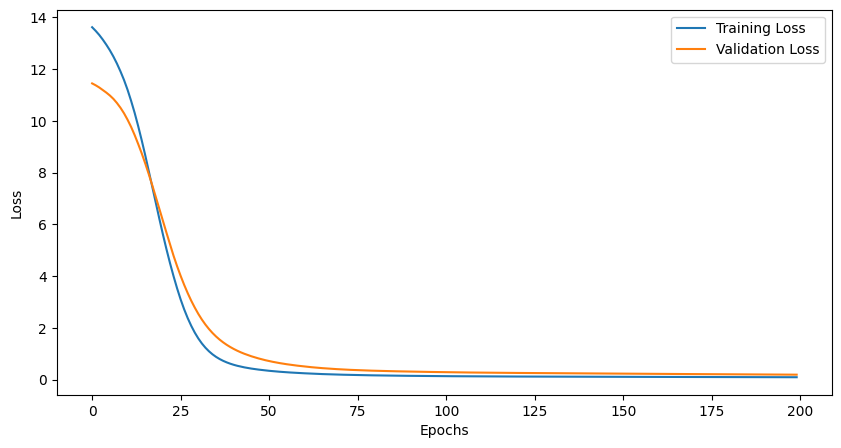

In [13]:

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)  # 10 input features, 5 nodes in hidden layer
        self.fc2 = nn.Linear(5, 1)   # 5 nodes in hidden layer, 1 output node

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create the network
net = Net()

# Create a synthetic dataset
x_train = torch.randn(100, 10)
y_train = torch.sum(x_train, axis=1).view(-1, 1)

x_val = torch.randn(20, 10)
y_val = torch.sum(x_val, axis=1).view(-1, 1)

# Define a loss function and an optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.015)

# Prepare lists to save the losses
train_losses = []
val_losses = []

# Train the network
for epoch in range(200):  # loop over the dataset multiple times
    net.train()
    optimizer.zero_grad()   # zero the gradient buffers
    output = net(x_train)   # forward pass
    loss = criterion(output, y_train)  # compute loss
    loss.backward()         # backpropagation
    optimizer.step()        # update weights

    net.eval()
    with torch.no_grad():
        val_output = net(x_val)
        val_loss = criterion(val_output, y_val)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    print(f'Epoch: {epoch+1}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

print('Finished Training')

# Save the model
torch.save(net.state_dict(), 'model.pth')

# Plot the training and validation losses
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
# Load the model
model = Net()
model.load_state_dict(torch.load('model.pth'))

x_test = torch.randn(10)


test_output = model(x_test)

print(x_test)
print(test_output)
print(torch.sum(x_test))

tensor([-0.5224, -2.3820, -1.1606,  1.1225,  1.3366,  2.0087,  0.3199,  0.4315,
         0.2292,  0.6719])
tensor([2.2770], grad_fn=<ViewBackward0>)
tensor(2.0554)
